In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
% cd word2vec_playground/

/content/gdrive/My Drive/word2vec_playground


In [ ]:
! wget https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2

--2021-09-01 01:12:29--  https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 701649852 (669M) [application/octet-stream]
Saving to: ‘idwiki-latest-pages-articles.xml.bz2’

idwiki-latest-pages 100%[===================>] 669.14M  4.53MB/s    in 2m 29s  

2021-09-01 01:14:59 (4.49 MB/s) - ‘idwiki-latest-pages-articles.xml.bz2’ saved [701649852/701649852]



In [ ]:
import sys
from gensim.corpora import WikiCorpus
import multiprocessing
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [ ]:
namaFileInput = "idwiki-latest-pages-articles.xml.bz2"
namaFileOutput = "wiki.id.case.text"
 
space = " "
i = 0
 
output = open(namaFileOutput, 'w')

 
# lower=False: huruf kecil dan besar dibedakan
wiki = WikiCorpus(namaFileInput, lemmatize=False, dictionary={}, lower=False)
for text in wiki.get_texts():
    output.write(' '.join(text) + '\n')
    i = i + 1
    if i % 10000 == 0:
      print(f"[INFO] Menyimpan {i} artikel")
 
output.close()
print(f"[INFO] Selesai menyimpan {i} artikel")

[INFO] Menyimpan 10000 artikel
[INFO] Menyimpan 20000 artikel
[INFO] Menyimpan 30000 artikel
[INFO] Menyimpan 40000 artikel
[INFO] Menyimpan 50000 artikel
[INFO] Menyimpan 60000 artikel
[INFO] Menyimpan 70000 artikel
[INFO] Menyimpan 80000 artikel
[INFO] Menyimpan 90000 artikel
[INFO] Menyimpan 100000 artikel
[INFO] Menyimpan 110000 artikel
[INFO] Menyimpan 120000 artikel
[INFO] Menyimpan 130000 artikel
[INFO] Menyimpan 140000 artikel
[INFO] Menyimpan 150000 artikel
[INFO] Menyimpan 160000 artikel
[INFO] Menyimpan 170000 artikel
[INFO] Menyimpan 180000 artikel
[INFO] Menyimpan 190000 artikel
[INFO] Menyimpan 200000 artikel
[INFO] Menyimpan 210000 artikel
[INFO] Menyimpan 220000 artikel
[INFO] Menyimpan 230000 artikel
[INFO] Menyimpan 240000 artikel
[INFO] Menyimpan 250000 artikel
[INFO] Menyimpan 260000 artikel
[INFO] Menyimpan 270000 artikel
[INFO] Menyimpan 280000 artikel
[INFO] Menyimpan 290000 artikel
[INFO] Menyimpan 300000 artikel
[INFO] Menyimpan 310000 artikel
[INFO] Menyimpan 

In [ ]:
# training model
namaFileInput = "wiki.id.case.text"
namaFileOutput = "w2vec_wiki_id_case"
 
model = Word2Vec(LineSentence(namaFileInput), size=400, window=5, min_count=5, workers=multiprocessing.cpu_count())
 
# trim unneeded model memory = use (much) less RAM
model.init_sims(replace=True)
model.save(namaFileOutput)

In [ ]:
# load model
model = Word2Vec.load("w2vec_wiki_id_case")

In [ ]:
model.most_similar('AI')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Ivchenko', 0.6006324291229248),
 ('FPGA', 0.5459084510803223),
 ('GPU', 0.5445606708526611),
 ('RISC', 0.5443533062934875),
 ('MOS', 0.5417739152908325),
 ('Interface', 0.5365102887153625),
 ('Nvidia', 0.5353744626045227),
 ('ARM', 0.5330243110656738),
 ('Artificial', 0.5320066809654236),
 ('Intelligent', 0.5280733108520508)]

In [ ]:
model.similar_by_word("presiden", topn=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('Presiden', 0.7879735231399536),
 ('presidennya', 0.7460496425628662),
 ('kepresidenan', 0.6101039052009583),
 ('ketuanya', 0.5505362153053284),
 ('Senator', 0.5453803539276123)]

In [ ]:
! pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=b5d0c5d271cf33b26634cc2eea5196905d58995a014721e92b94929676cbc217
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
words = ["pepaya", "pisang", "apel", "sosis", "samsung", "apple", "kucing"]
word_vector = []
for w in words:
  word_vector.append(model[w])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [ ]:
import pandas as pd
pca = PCA(n_components=2)
word_red = pca.fit_transform(word_vector)
word_red = pd.DataFrame(word_red)
word_red['label'] = words

In [ ]:
word_red

,0,1,label
0,-0.383269,-0.201225,pepaya
1,-0.326954,-0.314455,pisang
2,-0.350521,0.024989,apel
3,-0.102714,0.020855,sosis
4,0.916936,-0.326353,samsung
5,0.082831,0.001453,apple
6,0.163690,0.794736,kucing


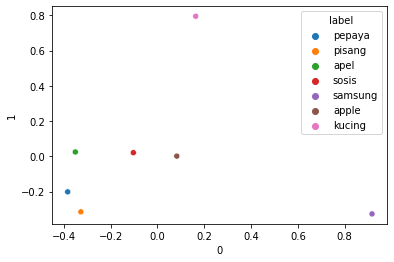

In [ ]:
import seaborn as sns
sns.scatterplot(data=word_red, x=0, y=1, hue='label');

In [ ]:
# raja - pria + wanita = ratu

In [ ]:
model['sosis'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(400,)